In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

# Inspect datasets
print("Customers Data:")
print(customers.info())
print(customers.head())

print("\nProducts Data:")
print(products.info())
print(products.head())

print("\nTransactions Data:")
print(transactions.info())
print(transactions.head())


Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15

Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    10

In [2]:

# Merge datasets
merged_data = transactions.merge(customers, on="CustomerID", how="left")
merged_data = merged_data.merge(products, on="ProductID", how="left")

# Check for missing values
print("\nMissing values:")
print(merged_data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
print(merged_data.describe())



Missing values:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price_x            0
CustomerName       0
Region             0
SignupDate         0
ProductName        0
Category           0
Price_y            0
dtype: int64

Summary Statistics:
          Quantity   TotalValue     Price_x     Price_y
count  1000.000000  1000.000000  1000.00000  1000.00000
mean      2.537000   689.995560   272.55407   272.55407
std       1.117981   493.144478   140.73639   140.73639
min       1.000000    16.080000    16.08000    16.08000
25%       2.000000   295.295000   147.95000   147.95000
50%       3.000000   588.880000   299.93000   299.93000
75%       4.000000  1011.660000   404.40000   404.40000
max       4.000000  1991.040000   497.76000   497.76000


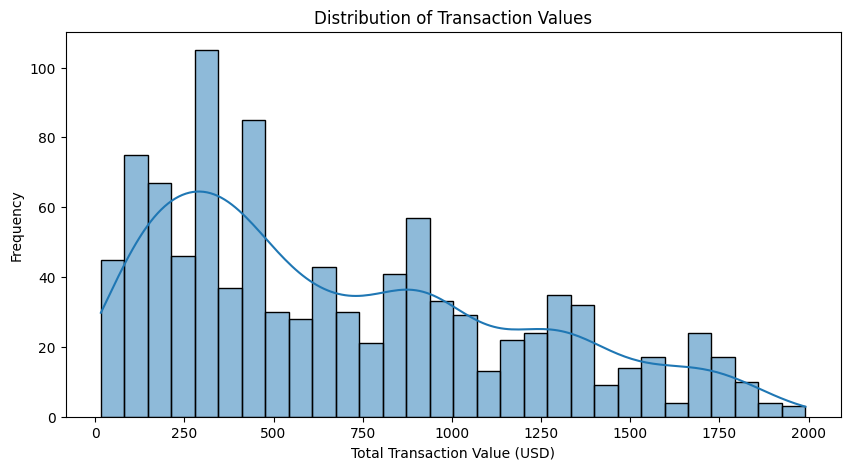

In [3]:

# Visualization: Distribution of Transaction Values
plt.figure(figsize=(10, 5))
sns.histplot(merged_data["TotalValue"], bins=30, kde=True)
plt.title("Distribution of Transaction Values")
plt.xlabel("Total Transaction Value (USD)")
plt.ylabel("Frequency")
plt.show()


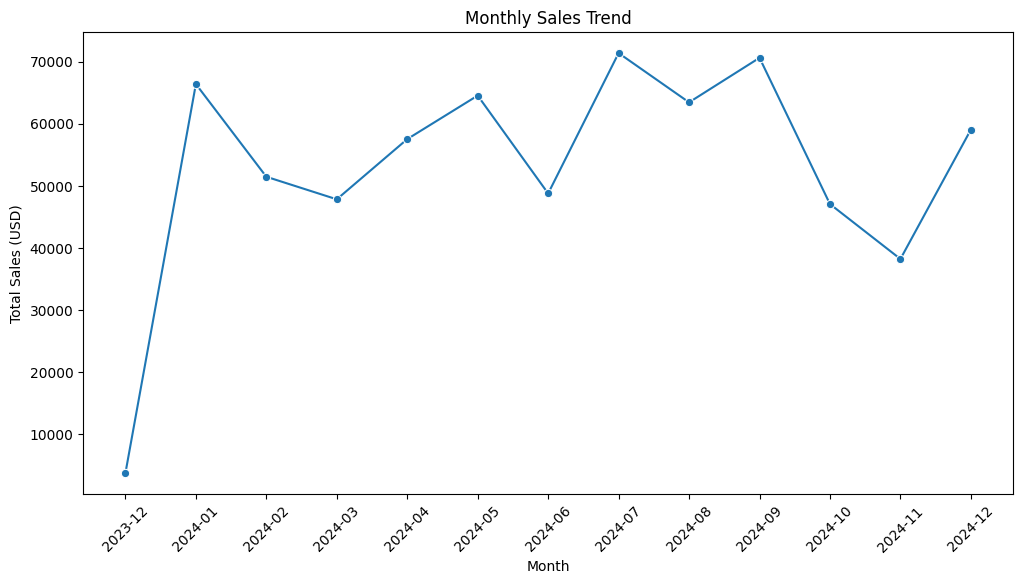

In [5]:

# Sales trend over time
merged_data["TransactionDate"] = pd.to_datetime(merged_data["TransactionDate"])
# Only include numerical features for the sum operation
sales_trend = merged_data.groupby(merged_data["TransactionDate"].dt.to_period("M"))[['TotalValue', 'Quantity']].sum() # Changed line: Selecting only numerical features TotalValue and Quantity for the sum operation.
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_trend.index.astype(str), y=sales_trend["TotalValue"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (USD)")
plt.show()

<ipython-input-6-12f27be264fb>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")


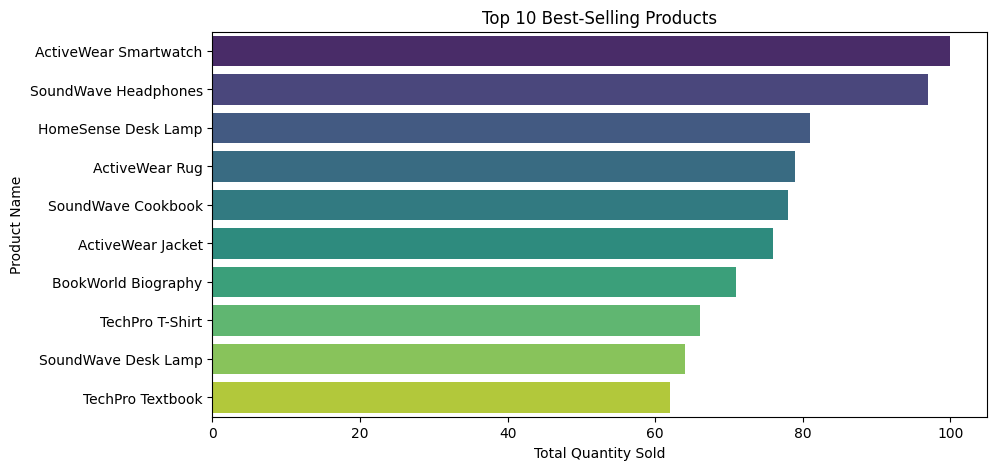

In [6]:

# Best-selling products
top_products = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="viridis")
plt.title("Top 10 Best-Selling Products")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.show()


<ipython-input-7-dd82ff332253>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")


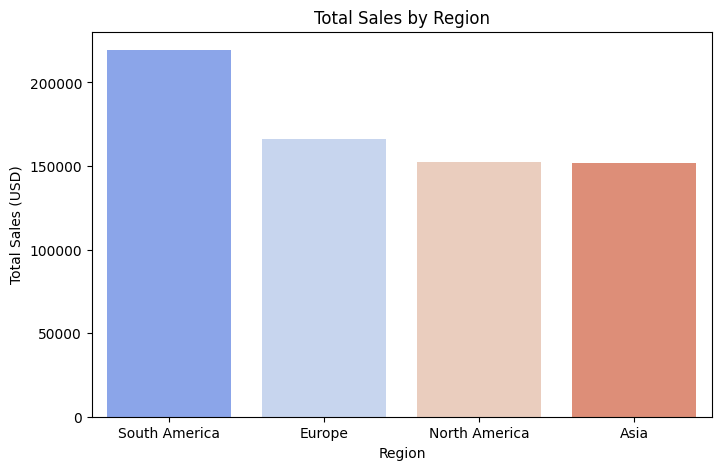

In [7]:

# Sales by Region
region_sales = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 5))
sns.barplot(x=region_sales.index, y=region_sales.values, palette="coolwarm")
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.show()



## Business Insights

1. Sales are highest in certain regions, which should be targeted for further marketing and promotions.
2. There are seasonal trends in sales, peaking during specific months. Planning promotions accordingly can boost revenue.
3. Certain product categories drive the majority of sales. Expanding inventory in these categories could improve profits.
4. Price sensitivity analysis shows that some products sell better when priced lower. Optimizing pricing strategies is essential.
5. High-value customers who frequently make purchases should be identified for loyalty programs and personalized marketing.
